# Importing Relevant Python Libraries

In [39]:
# Data Analysis and Wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Extracting Data

In [40]:
list1 = pd.read_csv('listings.csv')
list2 = pd.read_csv('listings2.csv')

# Data Size Metrics

In [43]:
#print(list1.columns.values)
print(list1.shape)

(3818, 16)


In [46]:
#list2.columns.values)
print(list2.shape)

(3818, 92)


In [154]:
# Join list1 and list2 to create the x vector
X = pd.concat([list1, list2], axis=1)
X.shape
X=X[X['property_type'].notnull()]

In [173]:
X['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast', 'Other',
       'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent'], dtype=object)

# Feature Engineering

In [168]:
i=0
for item in X['property_type'].unique():
    a=X['property_type'] == X['property_type'].unique()[i]
    X[item] = a.map(lambda x: 1 if x == True else 0)
    i=i+1
X.shape

(3817, 124)

In [169]:
Z1=X.loc[:, X.dtypes == np.float64] #Extracting columns with values of type float 
Z2=X.loc[:, X.dtypes == np.int64]   #Extracting columns with values of type int
X_numeric=pd.concat([Z1,Z2], axis=1)

In [174]:
# X_numeric has duplicate columns. The code below removes the duplicate columns
_, i = np.unique(X_numeric.columns, return_index=True)
X_Num_Cov=X_numeric.iloc[:, i]
X_Num_Cov.to_csv('Numerical_FS.csv')
X_Num_Cov.shape

(3817, 47)

In [183]:
space=['accommodates','bathrooms','bedrooms','beds','guests_included','latitude','longitude','price']
for item in X['property_type'].unique().tolist():
    space.append(item)

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'latitude',
 'longitude',
 'price',
 'Apartment',
 'House',
 'Cabin',
 'Condominium',
 'Camper/RV',
 'Bungalow',
 'Townhouse',
 'Loft',
 'Boat',
 'Bed & Breakfast',
 'Other',
 'Dorm',
 'Treehouse',
 'Yurt',
 'Chalet',
 'Tent']

In [184]:
# Selecting certian numerical features
X_select = X_Num_Cov[space]
# Dropping the missing values from the feature space
X_select = X_select.dropna()
# Creating the output space
Y = X_select['price']
X_select = X_select.drop(['price'], axis = 1)
print(X_select.info())
X_select.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3795 entries, 0 to 3817
Data columns (total 23 columns):
accommodates       3795 non-null int64
bathrooms          3795 non-null float64
bedrooms           3795 non-null float64
beds               3795 non-null float64
guests_included    3795 non-null int64
latitude           3795 non-null float64
longitude          3795 non-null float64
Apartment          3795 non-null int64
House              3795 non-null int64
Cabin              3795 non-null int64
Condominium        3795 non-null int64
Camper/RV          3795 non-null int64
Bungalow           3795 non-null int64
Townhouse          3795 non-null int64
Loft               3795 non-null int64
Boat               3795 non-null int64
Bed & Breakfast    3795 non-null int64
Other              3795 non-null int64
Dorm               3795 non-null int64
Treehouse          3795 non-null int64
Yurt               3795 non-null int64
Chalet             3795 non-null int64
Tent               3795 n

,accommodates,bathrooms,bedrooms,beds,guests_included,latitude,longitude,Apartment,House,Cabin,...,Townhouse,Loft,Boat,Bed & Breakfast,Other,Dorm,Treehouse,Yurt,Chalet,Tent
0,4,1.0,1.0,1.0,2,47.636289,-122.371025,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1.0,1.0,1.0,1,47.639123,-122.365666,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,4.5,5.0,7.0,10,47.629724,-122.369483,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.0,0.0,2.0,1,47.638473,-122.369279,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,2.0,3.0,3.0,6,47.632918,-122.372471,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Data Visualization

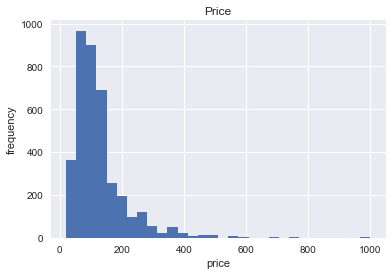

In [185]:
plt.hist(Y, bins=30)
plt.xlabel('price')
plt.ylabel('frequency')
plt.title("Price")

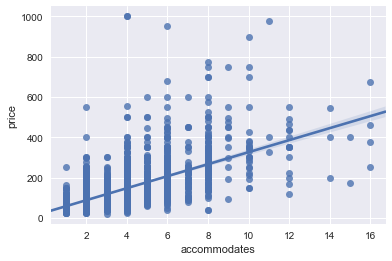

In [186]:
ax = sns.regplot(X_select['accommodates'], Y)

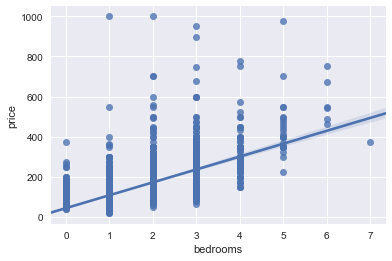

In [187]:
ax = sns.regplot(X_select['bedrooms'], Y)

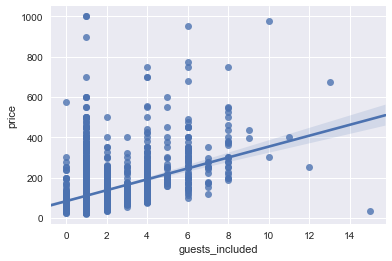

In [188]:
ax = sns.regplot(X_select['guests_included'], Y)

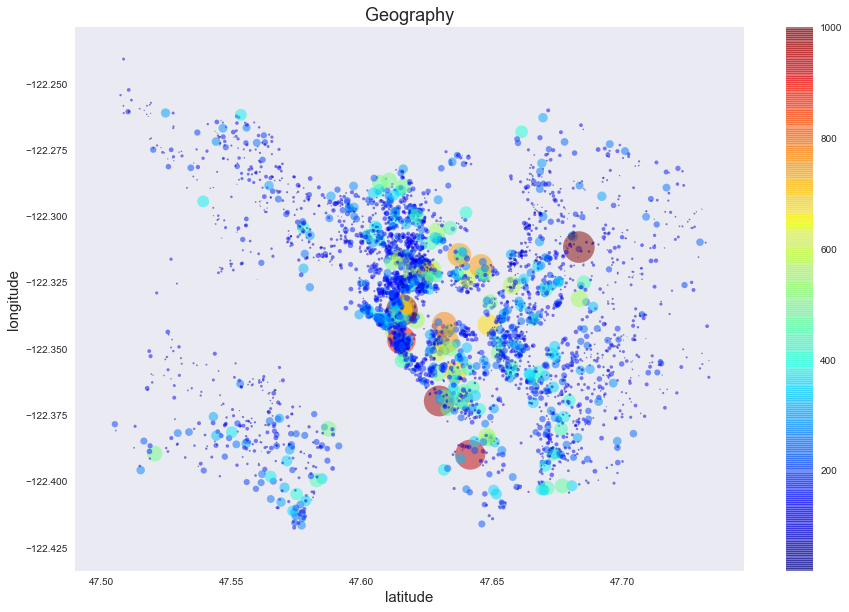

In [189]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
cm = plt.cm.get_cmap('jet')
sc = ax.scatter(X_select['latitude'],X_select['longitude'], s=Y**2/1000,c=Y,cmap=cm,linewidth=0,alpha=0.5)
ax.grid()
fig.colorbar(sc)
plt.xlabel('latitude',fontsize=15)
plt.ylabel('longitude',fontsize=15)
plt.title("Geography",fontsize=18)
plt.show()

# Preliminary Model Analysis

### Splitting data into training and testing sets

In [190]:
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_select, Y, test_size=num_test, random_state=100)

### Ridge regression

In [191]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [192]:
y_test_predict=clf.predict(X_test)
np.size(y_test_predict)

759

In [193]:
y_train_predict=clf.predict(X_train)
np.size(y_train_predict)

3036

In [194]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_test = sqrt(mean_squared_error(y_test, y_test_predict))
rms_test

66.69964546593818

In [195]:
rms_train = sqrt(mean_squared_error(y_train, y_train_predict))
rms_train

62.140953895142935

In [196]:
clf.score(X_test, y_test)

0.49764752766063325

In [197]:
clf.score(X_train, y_train)

0.51758984194827418